In [32]:
import os
import sys
import importlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append(os.path.abspath(os.path.join("..")))
import src.data_loader
importlib.reload(src.data_loader)
from src.data_loader import load_ospd_time_series, load_ospd_weather_data, merge_time_and_weather

sns.set(style="whitegrid")


In [33]:
load_df = load_ospd_time_series()
weather_df = load_ospd_weather_data()

display(load_df.head())
display(weather_df.head())

# Check datetime ranges
print("Load:", load_df["datetime"].min(), "to", load_df["datetime"].max())
print("Weather:", weather_df["datetime"].min(), "to", weather_df["datetime"].max())

# Check for missing values
print("Missing Load Data:\n", load_df.isnull().sum())
print("Missing Weather Data:\n", weather_df.isnull().sum())

# Print data length
print("Load Data Length:\n", load_df.shape[0])
print("Weather Data Length:\n", weather_df.shape[0])



,datetime,load,load_forecast,solar,solar_profile,wind,wind_profile
0,2014-12-31 23:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01 00:00:00+00:00,41151.0,39723.0,NaN,NaN,8852.0,0.3171
2,2015-01-01 01:00:00+00:00,40135.0,38813.0,NaN,NaN,9054.0,0.3244
3,2015-01-01 02:00:00+00:00,39106.0,38490.0,NaN,NaN,9070.0,0.3249
4,2015-01-01 03:00:00+00:00,38765.0,38644.0,NaN,NaN,9163.0,0.3283


,datetime,temp,rad_direct,rad_diffuse
0,1980-01-01 00:00:00+00:00,-1.261,0.0,0.0
1,1980-01-01 01:00:00+00:00,-1.414,0.0,0.0
2,1980-01-01 02:00:00+00:00,-1.571,0.0,0.0
3,1980-01-01 03:00:00+00:00,-1.760,0.0,0.0
4,1980-01-01 04:00:00+00:00,-1.995,0.0,0.0


Load: 2014-12-31 23:00:00+00:00 to 2020-09-30 23:00:00+00:00
Weather: 1980-01-01 00:00:00+00:00 to 2019-12-31 23:00:00+00:00
Missing Load Data:
 datetime            0
load                1
load_forecast      25
solar             104
solar_profile    6705
wind               75
wind_profile     6676
dtype: int64
Missing Weather Data:
 datetime       0
temp           0
rad_direct     0
rad_diffuse    0
dtype: int64
Load Data Length:
 50401
Weather Data Length:
 350640


In [34]:
df = merge_time_and_weather(load_df, weather_df)
display(df.head())
print("Dates:", df.index.min(), "to", df.index.max())
print("Missing Data:\n", df.isnull().sum())
print("Data Length:\n", load_df.shape[0])

,load,load_forecast,solar,solar_profile,wind,wind_profile,temp,rad_direct,rad_diffuse
datetime,,,,,,,,,
2015-01-01 07:00:00+00:00,41133.0,42522.0,71.0,0.0019,10208.0,0.3657,-1.692,0.4328,6.7680
2015-01-01 08:00:00+00:00,42963.0,45020.0,773.0,0.0207,10029.0,0.3593,-1.046,8.8773,51.9464
2015-01-01 09:00:00+00:00,45088.0,47101.0,2117.0,0.0568,10550.0,0.3780,0.072,34.1583,97.0929
2015-01-01 10:00:00+00:00,47013.0,49603.0,3364.0,0.0903,11390.0,0.4080,0.866,56.5458,120.2907
2015-01-01 11:00:00+00:00,48159.0,49910.0,4198.0,0.1127,12103.0,0.4336,1.493,62.8690,126.2112


Dates: 2015-01-01 07:00:00+00:00 to 2019-12-30 22:00:00+00:00
Missing Data:
 load             0
load_forecast    0
solar            0
solar_profile    0
wind             0
wind_profile     0
temp             0
rad_direct       0
rad_diffuse      0
dtype: int64
Data Length:
 50401


In [35]:
# Time features
df["hour"] = df.index.hour
df["dayofweek"] = df.index.dayofweek
df["is_weekend"] = df["dayofweek"].isin([5, 6]).astype(int)

# Lag features
df["load_t-1"] = df["load"].shift(1)
df["load_t-24"] = df["load"].shift(24)

# Rolling mean
df["load_rolling_24h"] = df["load"].rolling(24).mean()

# Drop rows with NA values (from shift/roll)
df = df.dropna()
df.head()

,load,load_forecast,solar,solar_profile,wind,wind_profile,temp,rad_direct,rad_diffuse,hour,dayofweek,is_weekend,load_t-1,load_t-24,load_rolling_24h
datetime,,,,,,,,,,,,,,,
2015-01-02 07:00:00+00:00,54131.0,51540.0,38.0,0.0010,26590.0,0.9522,0.893,0.2572,6.4205,7,4,0,50418.0,41133.0,46776.000000
2015-01-02 08:00:00+00:00,56505.0,53133.0,252.0,0.0068,25934.0,0.9287,1.577,1.5738,35.8543,8,4,0,54131.0,42963.0,47340.250000
2015-01-02 09:00:00+00:00,58447.0,54446.0,667.0,0.0179,25641.0,0.9182,2.327,3.6359,68.0313,9,4,0,56505.0,45088.0,47896.875000
2015-01-02 10:00:00+00:00,59453.0,55685.0,1262.0,0.0339,25810.0,0.9242,3.027,7.9580,100.6625,10,4,0,58447.0,47013.0,48415.208333
2015-01-02 11:00:00+00:00,59201.0,55627.0,1726.0,0.0463,25642.0,0.9182,3.517,10.5469,112.3497,11,4,0,59453.0,48159.0,48875.291667


In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

df["forecast_error"] = df["load_forecast"] - df["load"]
df["abs_error"] = np.abs(df["forecast_error"])
df["squared_error"] = df["forecast_error"] ** 2
df["pct_error"] = df["abs_error"] / df["load"] * 100

mae = mean_absolute_error(df["load"], df["load_forecast"])
rmse = np.sqrt(mean_squared_error(df["load"], df["load_forecast"]))
mape = df["pct_error"].mean()

print(f"MAE:  {mae:.2f} MW")
print(f"RMSE: {rmse:.2f} MW")
print(f"MAPE: {mape:.2f}%")

MAE:  1719.05 MW
RMSE: 2234.99 MW
MAPE: 3.08%


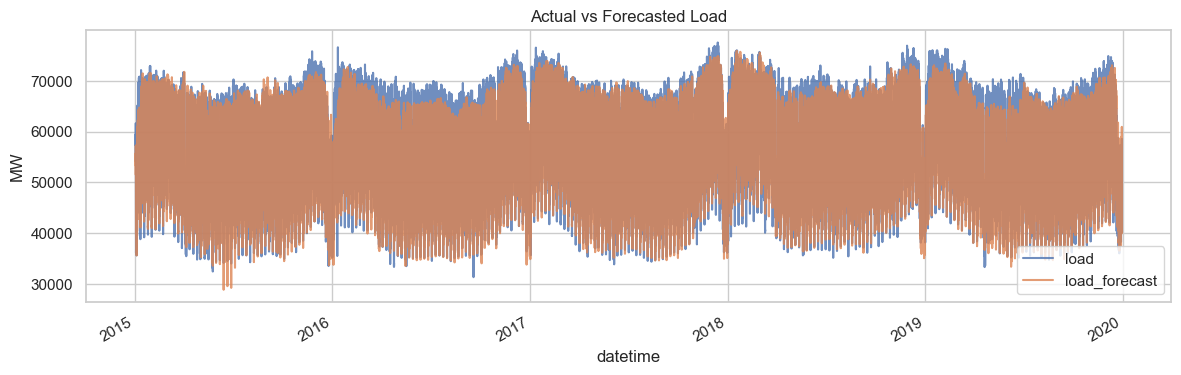

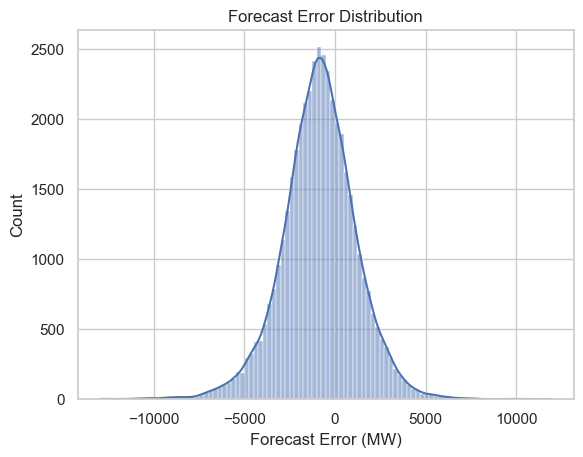

In [40]:
# Plot actual vs forecast
df[["load", "load_forecast"]].plot(figsize=(14, 4), alpha=0.8)
plt.title("Actual vs Forecasted Load")
plt.ylabel("MW")
plt.show()

# Forecast error distribution
sns.histplot(df["forecast_error"], bins=100, kde=True)
plt.title("Forecast Error Distribution")
plt.xlabel("Forecast Error (MW)")
plt.show()

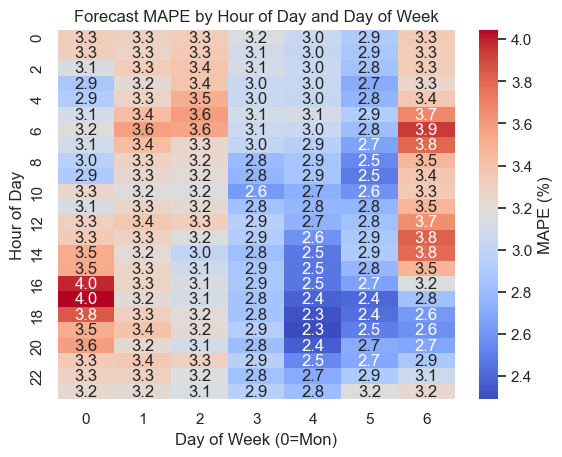

In [42]:
heatmap_df = df.groupby(["hour", "dayofweek"])["pct_error"].mean().unstack()
sns.heatmap(heatmap_df, cmap="coolwarm", annot=True, fmt=".1f", cbar_kws={"label": "MAPE (%)"})
plt.title("Forecast MAPE by Hour of Day and Day of Week")
plt.xlabel("Day of Week (0=Mon)")
plt.ylabel("Hour of Day")
plt.show()


In [58]:
import holidays
df['date_only'] = df.index.date
#print(df['date_only'])
years = df.index.year.unique()
min_year, max_year = years.min(), years.max()
de_holidays = holidays.country_holidays("DE", years=range(min_year, max_year+1))
df['is_holiday'] = df['date_only'].isin(de_holidays).astype(int)
print(df[['is_holiday']].value_counts())


is_holiday
0             42566
1              1080
Name: count, dtype: int64


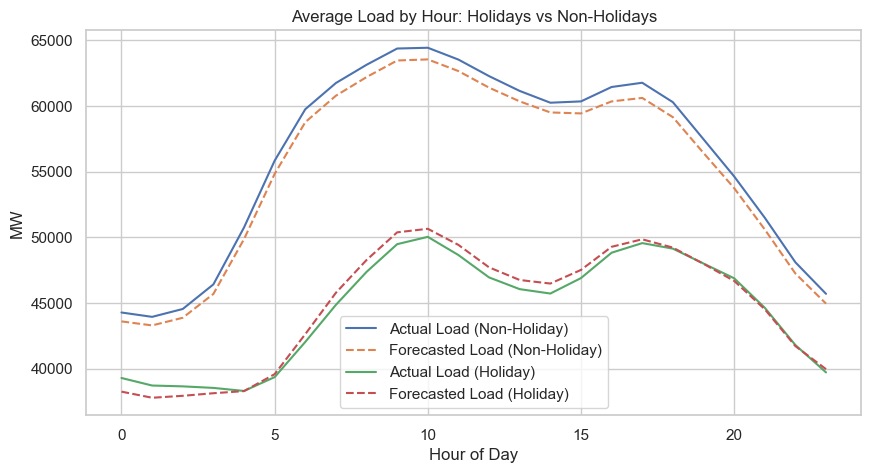

In [59]:
# Group by hour and holiday flag
avg_by_hour = df.groupby(["is_holiday", "hour"])[["load", "load_forecast"]].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
for is_holiday, label in zip([0, 1], ["Non-Holiday", "Holiday"]):
    subset = avg_by_hour[avg_by_hour["is_holiday"] == is_holiday]
    plt.plot(subset["hour"], subset["load"], label=f"Actual Load ({label})", linestyle='-')
    plt.plot(subset["hour"], subset["load_forecast"], label=f"Forecasted Load ({label})", linestyle='--')

plt.title("Average Load by Hour: Holidays vs Non-Holidays")
plt.xlabel("Hour of Day")
plt.ylabel("MW")
plt.legend()
plt.grid(True)
plt.show()
